# **C213: Sistemas Embarcados**
**Professor**: Samuel Baraldi Mafra

**PED:** Igor Gonçalves de Souza

## **Objetivos:**
Este exemplo visa detalhar a criação de Funções de Transferência e plotagem da Resposta Típica para Sistemas de Segunda Ordem.

Conteúdo:
  + Sistemas de Segunda Ordem em Malha Aberta;
  + Método `step_info()` e parâmetros de resposta do Sistema;
  + Sistemas de Segunda Ordem em Malha Fechada;
  + Comparação Malha Aberta *vs* Malha Fechada.


### **Sistemas de Segunda Ordem:**
O modelo matemático de um Sistema pode ser representado através de uma Função de Transferência que relaciona os sinais de saída - $PV(s)$, e entrada - $SP(s)$, por meio da transformada de Laplace.

Para um Sistema de Segunda Ordem, a Função de Transferência na forma canônica é dada pelo modelo a seguir, em que *\omega_{n}* é a **Frequência de Oscilação** e $\xi$, o **Fator de Amortecimento**: $$$$

$$ H(s) = \frac{PV(s)}{SP(s)} = \frac{\omega_n^2}{s^2+2\xi\omega_n\cdot s + \omega_n^2}.$$ $$$$

Os Sistemas de Controle podem operar em:
  - **malha aberta**: sistemas em que o sinal de saída não
exerce nenhuma ação de controle;
  - **malha fechada**: sistemas em que o sinal de saída gera um erro no processo, o qual é realimentado como ação de controle do sistema.

A curva de resposta é dividida em dois regimes:
  - **resposta transitória**: estado inicial do sistema, em que o sinal varia muito rapidamente no tempo e que tende à um estado final chamado de resposta estacionária ou permanente;
  - **resposta estacionária**: regime em que o comportamento do sinal de saída varia  pouco com o tempo. A amplitude estacionária do processo é definida como **valor final**.

A Resposta Típica de Sistemas de Segunda Ordem para uma entrada do tipo Degrau apresenta oscilações em torno do Valor Final no regime transitório, conforme gráfico a seguir: $$$$

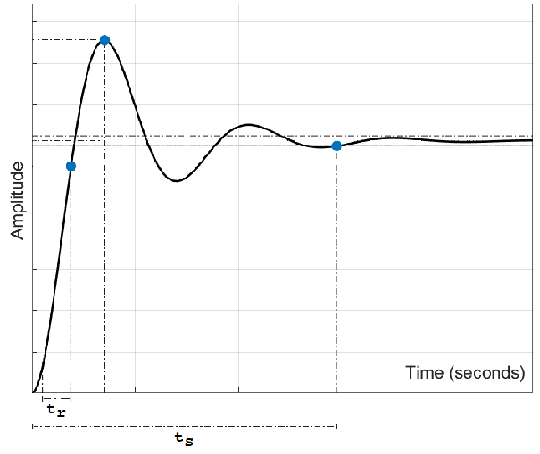

O **Tempo de Subida** caracteriza o intervalo necessário para que a amplitude da saída varie de $10\%$ a $90\%$ do valor final. A maior amplitude da saída é definida como **Amplitude de Pico**, medida por um fator de ***overshoot*** como uma porcentagem do valor final.

### **Pacote Control**
A Biblioteca de Sistemas de Controle Python (python-control) é um pacote que implementa operações básicas para análise e projeto de Sistemas de Controle.

Acesse: [Documentação python-control](https://pypi.org/project/control/)

In [1]:
#!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 2.9 MB/s eta 0:00:00


In [2]:
import numpy as np                # Suporte para arrays e operações matemáticas.
import control as ctrl            # Suporte para manipulação de Sistemas de Controle.
import matplotlib.pyplot as plt   # Suporte para visualização de gráficos.

### **Sistemas de Segunda Ordem em Malha Aberta:**
Para criação de um modelo de Função de Transferência, utilize o método `tf([num], [den])` com Vetores indicando os coeficientes dos polinômios do numerador e denominador.

Convencionalmente, as variáveis para Sistemas de Controle são nomeadas por `sys`.

Acesse: [control.TransferFunction](https://python-control.readthedocs.io/en/0.10.1/generated/control.TransferFunction.html)

Como exemplo, o Sistema de Controle com $\omega_n=1$ e $\xi=0.28$ tem como modelo $$$$
$$ H(s) = \frac{1}{s^2+0.56s+1}. $$

In [3]:
sys = ctrl.tf(1, [1, 0.56, 1])
print(sys)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       1
----------------
s^2 + 0.56 s + 1



Para observar a Resposta do Sistema de Controle à diferentes tipos de entrada, utilize as fontes:
  - `ctrl.impulse(tf)`: resposta do Sistema de Controle à uma entrada do tipo **Impulso**. Veja mais em [Resposta ao Impulso](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions)
  - `ctrl.step(tf)`: resposta do Sistema de Controle à uma entrada do tipo **Degrau**. Veja mais em [Resposta ao Degrau](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions)

Acesse: [Funções de Resposta](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions) para Resposta do Sistema à outros tipos de entrada.

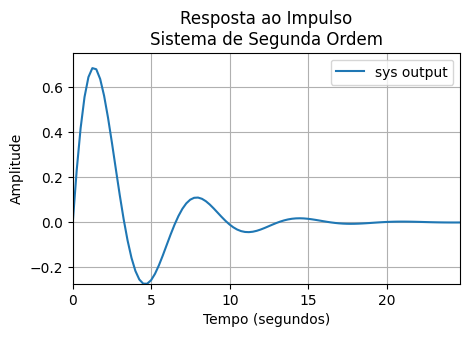

<Figure size 640x480 with 0 Axes>

In [4]:
# Amostras de Amplitude da Resposta ao Impulso ao longo do Tempo.
# ctrl.impulse_response(sys).plot()
[Tempo, Amplitude] = ctrl.impulse_response(sys)

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)
plt.title('Resposta ao Impulso\nSistema de Segunda Ordem')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='upper right'), plt.grid(True)

print(), plt.show(), plt.savefig('Impulso.png', dpi=300);

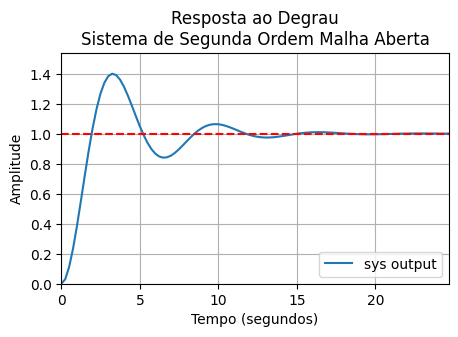

<Figure size 640x480 with 0 Axes>

In [5]:
# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys).plot()
[Tempo, Amplitude] = ctrl.step_response(sys)

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)
plt.axhline(y=Amplitude[-1], color='r', linestyle='--')

plt.title('Resposta ao Degrau\nSistema de Segunda Ordem Malha Aberta')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('Degrau.png', dpi=300);

Para um Degrau de amplitude diferente de $1$, multiplique a Função de Transferência na chamada do método `step_response()`.

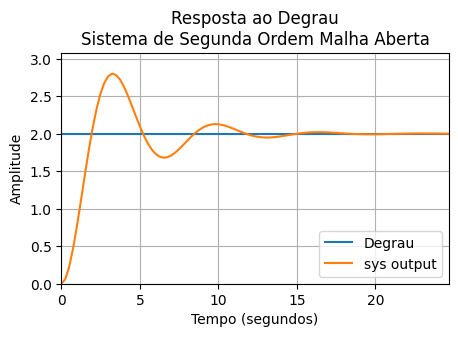

<Figure size 640x480 with 0 Axes>

In [6]:
# Defina a amplitude do Degrau de Entrada.
amplitudeDegrau = 2;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys*amplitudeDegrau).plot()
[Tempo, Amplitude] = ctrl.step_response(sys*amplitudeDegrau)
Degrau = np.ones(np.size(Tempo))*amplitudeDegrau

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Degrau, Tempo, Amplitude)
plt.title('Resposta ao Degrau\nSistema de Segunda Ordem Malha Aberta')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['Degrau', 'sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);

Para definir um valor inicial $V_0$ some a amplitude no retorno do método `step_response()`:

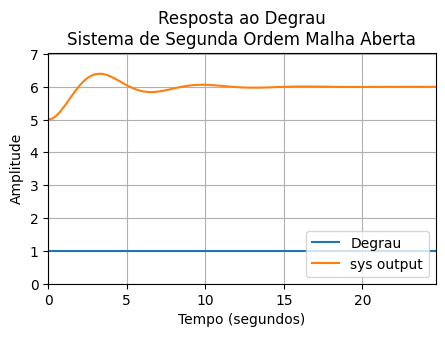

<Figure size 640x480 with 0 Axes>

In [7]:
# Defina o valor inicial do processo:
valorInicial = 5;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys).plot()
[Tempo, Amplitude] = ctrl.step_response(sys)
Degrau = np.ones(np.size(Tempo))
Amplitude += valorInicial

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Degrau, Tempo, Amplitude)
plt.title('Resposta ao Degrau\nSistema de Segunda Ordem Malha Aberta')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([0, np.max(Amplitude)*1.1])
plt.legend(['Degrau', 'sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);

### **Parâmetros da Resposta do Sistema - `step_info()`**
O método `step_info(sys)` retorna um `dict` com os parâmetros da Resposta ao Degrau do Sistema de Controle:
  - ***RiseTime* (Tempo de Subida)**: tempo de $10\%$ a $90\%$ do valor final;
  - ***SettlingTime* (Tempo de Acomodação)**: tempo para entrar no regime permanente segundo o Critério dos $2\%$, a $98\%$ do valor final;
  - ***SteadyStateValue* (Valor Final)**: amplitude do processo em regime permanente.

Acesse: [Método step_info()](https://python-control.readthedocs.io/en/0.10.1/generated/control.step_info.html#control.step_info)


In [8]:
infos_malhaAberta = ctrl.step_info(sys);
print('Parâmetros da resposta do Sistema:',
      f'  - Tempo de Subida: {infos_malhaAberta.get("RiseTime"):.2f} [s]',
      f'  - Tempo de Acomodação: {infos_malhaAberta.get("SettlingTime"):.2f} [s]',
      f'  - Valor Final: {infos_malhaAberta.get("SteadyStateValue"):.2f}', sep='\n')

Parâmetros da resposta do Sistema:
  - Tempo de Subida: 1.50 [s]
  - Tempo de Acomodação: 13.96 [s]
  - Valor Final: 1.00


In [9]:
infos_malhaAberta.keys()

dict_keys(['RiseTime', 'SettlingTime', 'SettlingMin', 'SettlingMax', 'Overshoot', 'Undershoot', 'Peak', 'PeakTime', 'SteadyStateValue'])

In [10]:
print('Características de Pico do Sistema:',
      f'  - Amplitude de Pico: {infos_malhaAberta.get("Peak"):.2f} [s]',
      f'  - Tempo de Pico: {infos_malhaAberta.get("PeakTime"):.2f} [s]',
      f'  - Overshoot: {infos_malhaAberta.get("Overshoot")/100:.2%}', sep='\n')

Características de Pico do Sistema:
  - Amplitude de Pico: 1.40 [s]
  - Tempo de Pico: 3.24 [s]
  - Overshoot: 39.98%


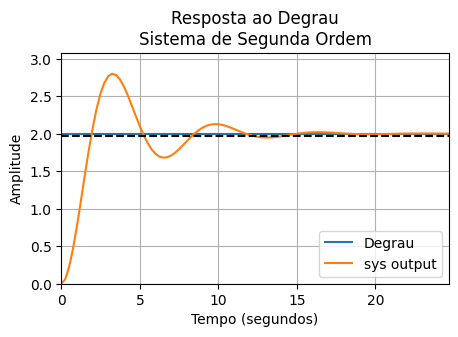

<Figure size 640x480 with 0 Axes>

In [11]:
# Defina a amplitude do Degrau de Entrada.
amplitudeDegrau = 2;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys*amplitudeDegrau).plot()
[Tempo, Amplitude] = ctrl.step_response(sys*amplitudeDegrau)
Degrau = np.ones(np.size(Tempo))*amplitudeDegrau

# Seja SettlingTime o Instanmte em que o Sistema entrada em Regime Permanente
# e regimePermanente a amplitude do processo neste instante.
settlingTime = np.where(Tempo == infos_malhaAberta.get('SettlingTime'))[0][0]
regimePermanente = Amplitude[settlingTime]

plt.figure(figsize=(5, 3))
plt.plot(Tempo, Degrau, Tempo, Amplitude)
plt.axhline(y=regimePermanente, color='k', linestyle='--')

plt.title('Resposta ao Degrau\nSistema de Segunda Ordem')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['Degrau', 'sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);


### **Sistemas de Segunda Ordem em Malha Fechada:**
Um Sistema de Controle em Malha Fechada, ilustrado na figura a seguir, opera com uma Malha de Realimentação (*feedback*) que compara os valores da saída - $PV(s)$ e da entrada - $SP(s)$, definindo o erro do Sistema, $e = SP(s) - PV(s)$.

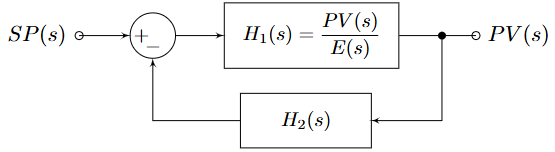

Sendo $H_1(s)$ a função de Transferência da Malha de Controle e $H_2(s)$, a Malha de Realimentação, a equivalente $H(s)$ do Sistema em Malha Fechada é dada como: $$$$

$$ H(s) = \frac{H_1(s)}{1+H_1(s)\cdot H_2(s)}, $$ $$$$

em que o sinal do denominador é oposto à realimentação de $PV(s)$. A realimentação padrão é negativa e unitária.

Por implementação, o método `ctrl.feedback()` não retorna a Função de Transferência na forma canônica. Acesse [Método feedback()](https://python-control.readthedocs.io/en/0.10.1/generated/control.InterconnectedSystem.html#control.InterconnectedSystem.feedback)


In [12]:
sys_fechada = ctrl.feedback(sys)
print(sys_fechada)

<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       1
----------------
s^2 + 0.56 s + 2



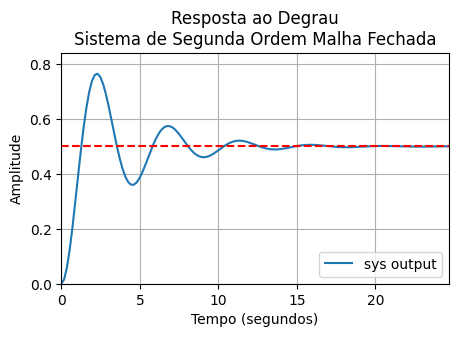

<Figure size 640x480 with 0 Axes>

In [13]:
# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.set_responde(sys_fechada).plot()
[Tempo, Amplitude] = ctrl.step_response(sys_fechada)

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)
plt.axhline(y=Amplitude[-1], color='r', linestyle='--')

plt.title('Resposta ao Degrau\nSistema de Segunda Ordem Malha Fechada')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='lower right'), plt.grid(True)

print()
plt.show(), plt.savefig('malhaFechada.png', dpi=300);

In [14]:
infos_malhaFechada = ctrl.step_info(sys_fechada);
print('Parâmetros da resposta do Sistema em Malha Fechada:',
      f'  - Tempo de Subida: {infos_malhaFechada.get("RiseTime"):.2f} [s]',
      f'  - Tempo de Acomodação: {infos_malhaFechada.get("SettlingTime"):.2f} [s]',
      f'  - Valor Final: {infos_malhaFechada.get("SteadyStateValue"):.2f}', sep='\n')

Parâmetros da resposta do Sistema em Malha Fechada:
  - Tempo de Subida: 0.89 [s]
  - Tempo de Acomodação: 14.02 [s]
  - Valor Final: 0.50


In [15]:
print('Características de Pico do Sistema:',
      f'  - Amplitude de Pico: {infos_malhaFechada.get("Peak"):.2f} [s]',
      f'  - Tempo de Pico: {infos_malhaFechada.get("PeakTime"):.2f} [s]',
      f'  - Overshoot: {infos_malhaFechada.get("Overshoot")/100:.2%}', sep='\n')

Características de Pico do Sistema:
  - Amplitude de Pico: 0.76 [s]
  - Tempo de Pico: 2.31 [s]
  - Overshoot: 52.93%


A definição do erro ao longo do Tempo, com $e = SP(s) - PV(s)$ permite visualizar a evolução da métrica:

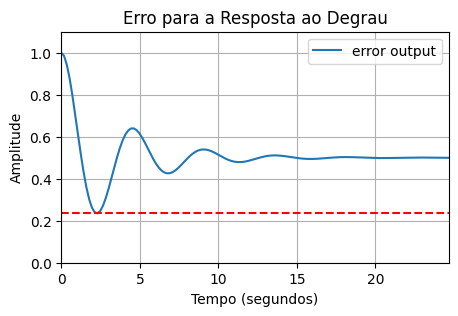

<Figure size 640x480 with 0 Axes>

In [16]:
# Defina a Amplitude do Degrau de Entrada:
amplitudeDegrau = 1;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.set_responde(sys_fechada).plot()
[Tempo, Amplitude] = ctrl.step_response(sys_fechada*amplitudeDegrau)
erro = amplitudeDegrau - Amplitude

plt.figure(figsize=(5, 3)), plt.plot(Tempo, erro)
plt.axhline(y=np.min(erro), color='r', linestyle='--')

plt.title('Erro para a Resposta ao Degrau')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.minimum(0, np.min(erro)), np.max(erro)*1.1])
plt.legend(['error output'], loc='upper right'), plt.grid(True)

print(), plt.show(), plt.savefig('malhaFechada.png', dpi=300);

### **Malha Aberta *vs* Malha Fechada**

In [17]:
print('Comparação entre Sistemas em Malha Aberta e Fechada:')

if infos_malhaAberta.get('RiseTime') < infos_malhaFechada.get('RiseTime'): print(f'  - O sistema em malha aberta tem menor Tempo de Subida.')
else: print(f'  - O sistema em malha fechada tem menor Tempo de Subida.')

if infos_malhaAberta.get('Peak') < infos_malhaFechada.get('Peak'): print(f'  - O sistema em malha aberta tem menor Amplitude de Pico.')
else: print(f'  - O sistema em malha fechada tem menor Amplitude de Pico.')

if infos_malhaAberta.get('Overshoot') < infos_malhaFechada.get('Overshoot'): print(f'  - O sistema em malha aberta tem menor Overshoot.')
else: print(f'  - O sistema em malha fechada tem menor Overshoot.')

Comparação entre Sistemas em Malha Aberta e Fechada:
  - O sistema em malha fechada tem menor Tempo de Subida.
  - O sistema em malha fechada tem menor Amplitude de Pico.
  - O sistema em malha aberta tem menor Overshoot.


Por análise, os Sistemas de Controle em Malha Fechada são mais rápidos em relação aos Sistemas em Malha Aberta, porém há uma perda de amplitude do processo.

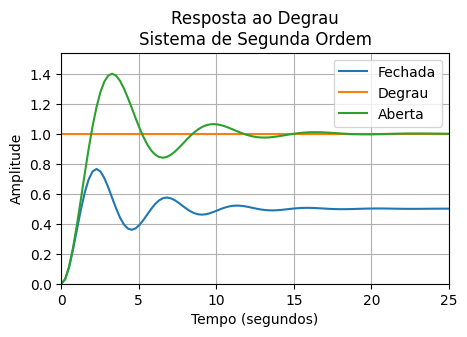

<Figure size 640x480 with 0 Axes>

In [18]:
# Definindo o Tempo total de simulação:
t = np.linspace(0, 25, 100);

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# O parâmetro opcional T especifica os instantes de amostragem do processo.
[Tempo, Amplitude_malhaFechada] = ctrl.step_response(sys_fechada, T=t)
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude_malhaFechada)

[Tempo, Amplitude_malhaAberta] = ctrl.step_response(sys, T=t)
Degrau = np.ones(np.size(Tempo))
plt.plot(Tempo, Degrau, Tempo, Amplitude_malhaAberta)

plt.title('Resposta ao Degrau\nSistema de Segunda Ordem')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([0, np.max([np.max(Amplitude_malhaAberta), np.max(Amplitude_malhaFechada), np.max(Degrau)])*1.1])
plt.legend(['Fechada', 'Degrau', 'Aberta'], loc='upper right'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);
